In [222]:
#display outcome data by neighborhood

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster
import numpy as np
import seaborn as sns

data = pd.read_csv("t3.csv",index_col=0).reset_index(drop=True)
data

,g_case_no,y_lat,x_lng,f_addr,gf_addr,c_case_type,c_violation,c_violation_date,j_finding,year,month,guilty,neighborhood
0,11000001,43.091474,-87.984090,"5700 W CAPITOL DR MILWAUKEE, WI","5700 W Capitol Dr, Milwaukee, WI 53216, USA",Municipal citation,"Ordinance 110-35-1, Retail Theft",2011-01-03 14:40:00.000000,Guilty,2011,1,1,Capitol Heights
1,11000002,43.068454,-87.918139,"2736 N 6TH ST MILWAUKEE, WI","2736 N 6th St, Milwaukee, WI 53212, USA",Municipal citation,"Ordinance 105-138-2, Resisting / Obstructing P...",2011-01-03 16:00:00.000000,Guilty,2011,1,1,Harambee
2,11000009,43.122443,-88.014475,"8223 W THURSTON AVE MILWAUKEE, WI","8223 W Thurston Ave, Milwaukee, WI 53218, USA",Summons & Complaint,"Ordinance 200 through 295, Building Code Viola...",2010-05-07 00:00:00.000000,Guilty,2010,5,1,Silver Spring
3,11000014,43.056875,-87.941243,"2020 N 23 ST MILWAUKEE, WI","2020 N 23rd St, Milwaukee, WI 53205, USA",Summons & Complaint,"Ordinance 200 through 295, Building Code Viola...",2010-06-08 00:00:00.000000,Guilty,2010,6,1,Midtown
4,11000024,43.054717,-87.936219,"1840 N 19 ST MILWAUKEE, WI","1840 N 19th St, Milwaukee, WI 53205, USA",Summons & Complaint,"Ordinance 200 through 295, Building Code Viola...",2010-03-30 00:00:00.000000,Guilty,2010,3,1,Lindsay Heights
5,11000067,43.042648,-87.921272,"749 W STATE ST MILWAUKEE, WI","749 W State St, Milwaukee, WI 53233, USA",Municipal citation,"Ordinance 106-38-2, Possession of Marijuana",2010-11-27 21:50:00.000000,Guilty,2010,11,1,Westown
6,11000079,43.058142,-87.947781,"2113 N 27TH ST MILWAUKEE, WI","2113 N 27th St, Milwaukee, WI 53208, USA",Municipal citation,"Ordinance 50-25-5, Resist or Obstruct Issuance...",2010-11-29 01:15:00.000000,Guilty,2010,11,1,Midtown
7,11000084,43.010455,-87.960779,"3708 W BURNHAM ST MILWAUKEE, WI","3708 W Burnham St, Milwaukee, WI 53215, USA",Municipal citation,"Ordinance 95-14-2-a, Home Improvement Contract...",2010-10-18 12:00:00.000000,Guilty,2010,10,1,Burnham Park
8,11000086,43.038363,-87.914639,"275 W WISCONSIN AVE MILWAUKEE, WI","275 W Wisconsin Ave, Milwaukee, WI 53203, USA",Municipal citation,"Ordinance 110-32-1-a, Fraud on Hotel or Restau...",2010-11-27 23:45:00.000000,Guilty,2010,11,1,Westown
9,11000087,43.039199,-87.915426,"310 W WISCONSIN AVE MILWAUKEE, WI","500, 310 W Wisconsin Ave, Milwaukee, WI 53203,...",Municipal citation,"Ordinance 106-1-1, Disorderly Conduct",2010-12-01 09:19:00.000000,Guilty,2010,12,1,Westown


In [223]:
data.c_violation.value_counts()

Ordinance 106-1-1, Disorderly Conduct                               18689
Ordinance 110-35-1, Retail Theft                                    11055
Ordinance 200 through 295, Building Code Violations                 10172
Ordinance 105-138-2, Resisting / Obstructing Police Officer          8033
Ordinance 105-2, Assault and Battery                                 6451
Ordinance 106-38-2, Possession of Marijuana                          6381
Ordinance 106-31-1, Loitering or Prowling                            5992
Ordinance 110-10-1, Trespassing Upon Buildings / Premises            5194
Ordinance 110-15, Vandalism                                          4907
Statute 346.57(5), Exceeding Speed Zones/Posted Limits               3921
Ordinance 106-36-3-a, Possession of Drug Paraphernalia               3261
Statute 343.44(1)(a), Operating After Suspension                     2920
Ordinance 80-63-1, Excessive Noise Prohibited                        2393
Ordinance 106-23.3-2, Contributing to 

In [224]:
#Percentage of non-guilty verdicts in each county
g = data["guilty"].values.T.tolist()
n = data["neighborhood"].values.T.tolist()

In [225]:
verdicts = pd.DataFrame(index=data.neighborhood.unique())

In [226]:
verdicts["num guilty"] = 0
verdicts["num non-guilty"] = 0
verdicts

,num guilty,num non-guilty
Capitol Heights,0,0
Harambee,0,0
Silver Spring,0,0
Midtown,0,0
Lindsay Heights,0,0
Westown,0,0
Burnham Park,0,0
Riverside Park,0,0
Historic Mitchell Street,0,0
Uptown,0,0


In [246]:
dict = { "ARLINGTON GARDENS": 2, "ARLINGTON HEIGHTS": 2, "BARAN PARK": 2, "BAY VIEW": 2,
"BLUEMOUND HEIGHTS": 2, "BORCHERT FIELD": 2, "BRADLEY ESTATES": 2, "BREWER'S HILL": 2,
"BRYNWOOD": 2, "BURNHAM PARK": 2, "BUCHEL PARK": 2, "CALUMET FARMS": 2,
"CAMBRIDGE HEIGHTS": 2, "CANNON PARK": 2, "COPERNICUS PARK": 2, "CAPITOL HEIGHTS": 2,
"CASTLE MANOR": 2, "CLAYTON CREST": 2, "CLARKE SQUARE": 2, "CLOCK TOWER ACRES": 2,
"COLLEGE HEIGHTS": 2, "COLD SPRING PARK": 2, "COLUMBUS PARK": 2, "CONCORDIA": 2,
"COOPER PARK": 2, "DINEEN PARK": 2, "DOWNER WOODS": 2, "DRETZKA PARK": 2, "EAST VILLAGE": 2,
"ENDERIS PARK": 2, "EUCLID PARK": 2, "FAIRFIELD": 2, "FAIRVIEW": 2, "FAIR PARK": 2,
"FERNWOOD": 2, "FLORIST HIGHLANDS": 2, "FOREST HOME HILLS": 2, "FRANKLIN HEIGHTS": 2,
"FREEDOM VILLAGE": 2, "GARDEN HOMES": 2, "GEN. MITCHELL INT. AIRPORT": 2, "GOLDEN GATE": 2,
"GOLDEN VALLEY": 2, "GOLDMAN PARK": 2, "GRACELAND": 2, "GRANTOSA": 2, "GRANVILLE STATION": 2,
"GRANVILLE WOODS": 2, "GRASSLYN MANOR": 2, "GREEN MOOR": 2, "GROVER HEIGHTS": 2,
"HALYARD PARK": 2, "HAMPTON HEIGHTS": 2, "HARAMBEE": 2, "HARBOR VIEW": 2, "HARDER'S OAKS": 2,
"HAVENWOODS": 2, "HAWLEY FARMS": 2, "HAWTHORNE GLEN": 2, "HAYMARKET": 2,
"HERITAGE HEIGHTS": 2, "HIGHWOOD ESTATES": 2, "HONEY CREEK MANOR": 2, "HONEY CREEK PARKWAY": 2,
"JACKSON PARK": 2, "JOHNSON'S WOODS": 2, "JUNEAU TOWN": 2, "KILBOURN TOWN": 2, "KING PARK": 2,
"KOPS PARK": 2, "LAND BANK": 2, "LAYTON PARK": 2, "LINCOLN CREEK": 2, "LINCOLN PARK": 2,
"LINCOLN VILLAGE": 2, "LINDSAY PARK": 2, "LITTLE MENOMONEE PARKWAY": 2, "LONG VIEW": 2,
"LOWER EAST SIDE": 2, "LYONS PARK": 2, "MACK ACRES": 2, "MAITLAND PARK": 2, "MAPLE TREE": 2,
"MARQUETTE": 2, "MARTIN DRIVE": 2, "MC GOVERN PARK": 2, "MELODY VIEW": 2, "MORGAN HEIGHTS": 2,
"MOUNT OLIVET": 2, "MENOMONEE RIVER HILLS": 2, "MENOMONEE RIVER HILLS EAST": 2,
"MENOMONEE RIVER VALLEY": 2, "MENOMONEE RIVER PARKWAY": 2, "METCALFE PARK": 2, "MIDTOWN": 2,
"MILL VALLEY": 2, "MILLER VALLEY": 2, "MURRAY HILL": 2, "NATIONAL PARK": 2, "NEW COELN": 2,
"NORTHPOINT": 2, "NORTHRIDGE": 2, "NORTHRIDGE LAKES": 2, "NORTH DIVISION": 2,
"NORTH GRANVILLE": 2, "NORTH MEADOWS": 2, "PARKWAY HILLS": 2, "PARK KNOLL": 2, "PARK PLACE": 2,
"PARK WEST": 2, "PHEASANT RUN": 2, "POLLBER HEIGHTS": 2, "RED OAK HEIGHTS": 2, "RIDGEVIEW": 2,
"RIVER BEND": 2, "RIVERSIDE PARK": 2, "RIVERTON HEIGHTS": 2, "RIVERWEST": 2, "ROLLING GREEN": 2,
"ROOT CREEK": 2, "ROOSEVELT GROVE": 2, "SCHLITZ PARK": 2, "SERVITE WOODS": 2, "SHERMAN PARK": 2,
"SILVER SWAN": 2, "SILVER CITY": 2, "SILVER SPRING": 2, "SAINT JOSEPH": 2, "STORY HILL": 2,
"UPPER EAST SIDE": 2, "VETERANS AFFAIRS": 2, "VOGEL PARK": 2, "WEDGEWOOD": 2, "WEST VIEW": 2,
"WHITE MANOR": 2, "WILLIAMSBURG HEIGHTS": 2, "WILLIAMSBURG": 2, "WOODLAND COURT": 2, "YANKEE HILL": 2,
"ZOO": 2, "SUNSET HEIGHTS": 2, "TIMMERMAN AIRPORT": 2, "TIMMERMAN WEST": 2, "UPTOWN": 2, "VALHALLA": 2,
"WHISPERING HILLS": 2, "WAHL PARK": 2, "WASHINGTON HEIGHTS": 2, "WASHINGTON PARK": 2, "WALNUT HILL": 2,
"TRIANGLE": 2, "TRIANGLE NORTH": 2, "PARK VIEW": 2, "WYRICK PARK": 2, "TOWN & COUNTRY MANOR": 2,
"TRIPOLI PARK": 2, "THURSTON WOODS": 2, "WAHL PARK": 2, "ROOSEVELT GROVE": 2, "RUFUS KING": 2,
"OLD NORTH MILWAUKEE": 2, "LINDSEY PARK": 2, "NASH PARK": 2, "MOUNT MARY": 2, "SUNSET HEIGHTS": 2,
"SHERMAN PARK": 2, "ST. JOSEPHS": 2, "UPTOWN": 2, "WASHINGTON HEIGHTS": 2, "WASHINGTON PARK": 2,
"WALNUT HILL": 2, "MIDTOWN": 2, "TRIANGLE": 2, "TRIANGLE NORTH": 2, "PARK VIEW": 2, "MITCHELL WEST": 2,
"WILSON PARK": 2, "TOWN OF LAKE": 2, "SAVLAND PARK": 2, "TIPPECANOE": 2, "MORGANDALE": 2,
"SOUTHPOINT": 2, "SOUTHGATE": 2, "POLONIA": 2, "MUSKEGO WAY": 2, "MITCHELL PARK": 2, "MITCHELL FIELD": 2,
"WALKER'S POINT": 2, "WICK FIELD": 2, "VALLEY FORGE": 2, "THE VALLEY / PIGSVILLE": 2, "MERRILL PARK": 2,
"HILLSIDE": 2, "HILLTOP PARISH": 2, "HISTORIC MITCHELL STREET": 2, "HISTORIC THIRD WARD": 2,
"HOLLER PARK": 2, "JONES' ISLAND": 2, "ESTABROOK PARK": 2, "ST. AMELIAN'S": 2, "LAKE PARK": 2,
"LENOX HEIGHTS": 2, "SAVELAND PARK": 2, "GRA-RAM": 2, "BROWN DEER PARK": 2, 'ALCOTT PARK': 2 }

In [228]:
#update dataframe
for x in range(0, len(g)):
    if g[x] == 1:
        #add 1 to guilty count of verdicts
        verdicts.loc[n[x], "num guilty"] = verdicts.loc[n[x], "num guilty"] + 1
    else:
        #add 1 to non-guilty count of verdicts
        verdicts.loc[n[x], "num non-guilty"] = verdicts.loc[n[x], "num non-guilty"] + 1

In [229]:
#update percentage
verdicts["percent non-guilty"] = 0.0
def percent(guilt, nguilt):
    return guilt+nguilt
    #return nguilt / (guilt+nguilt)
verdicts["percent non-guilty"] = verdicts["num non-guilty"] / (verdicts["num non-guilty"]+verdicts["num guilty"])

In [237]:
# add values to dict
for index, row in verdicts.iterrows():
    dict[str(index).upper()] = row['percent non-guilty']

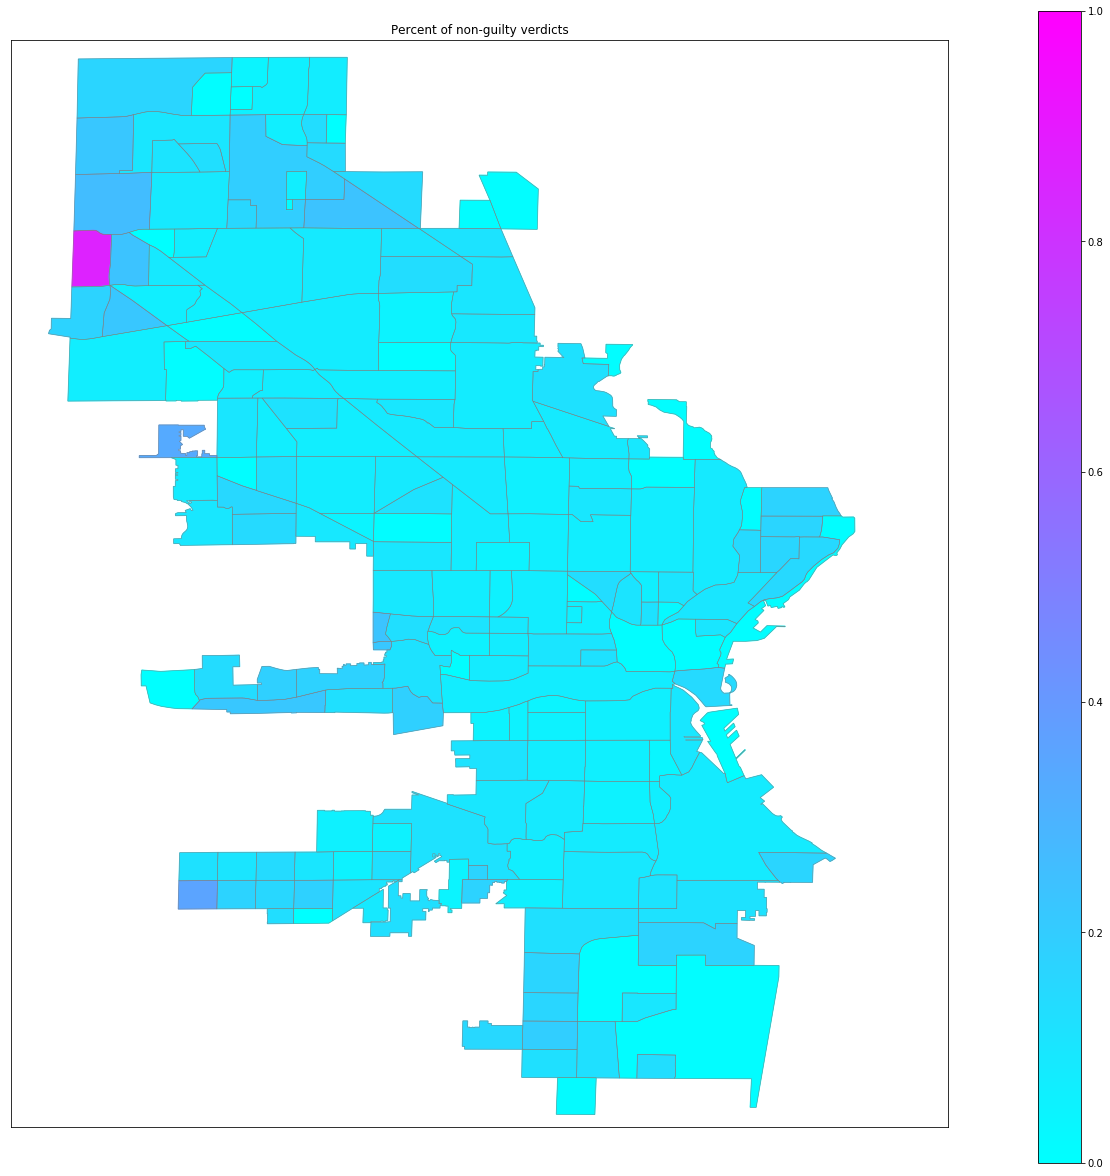

In [238]:
#plot percentage 
from __future__ import (absolute_import, division, print_function)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase
import random

fig, ax = plt.subplots(figsize=(20,20))


# Lambert Conformal map of lower 48 states.
m = Basemap(projection = "cyl",
              resolution = "h",
              lat_0 = 43.0389025,
              lon_0 = -87.9064736,
              llcrnrlon = -88.080736,
              llcrnrlat = 42.917670,
              urcrnrlon = -87.839722,
              urcrnrlat = 43.19712)

shp_info = m.readshapefile("mke_nei",name="neighborhood", drawbounds=True,linewidth=0.45,color="gray")

colors={}
statenames=[]
cmap = plt.cm.cool # use "reversed hot" colormap
vmin = 0; vmax = 1 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.neighborhood_info:
    statename = shapedict["NEIGHBORHD"]
    pop = dict[statename]
    colors[statename] = cmap(pop)
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.neighborhood):
    color = rgb2hex(colors[statenames[nshape]])
    poly = Polygon(seg,facecolor=color,edgecolor=color)
    ax.add_patch(poly)


ax.set_title("Percent of non-guilty verdicts")


#%% ---------   Show color bar  ---------------------------------------
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation="vertical",)

plt.show()

In [233]:
#disorderly conduct
verdicts['num dis conduct guilty'] = 0
verdicts['num dis conduct non-guilty'] = 0
for x in range(0, len(data)):
    if data.loc[x, 'c_violation'] == 'Ordinance 106-1-1, Disorderly Conduct':
        if g[x] == 1:
            verdicts.loc[data.loc[x, 'neighborhood'], 'num dis conduct guilty'] = verdicts.loc[data.loc[x, 'neighborhood'], 'num dis conduct guilty']+1
        else:
            verdicts.loc[data.loc[x, 'neighborhood'], 'num dis conduct non-guilty'] = verdicts.loc[data.loc[x, 'neighborhood'], 'num dis conduct non-guilty']+1
            
verdicts['percent dis conduct non-guilty'] = verdicts['num dis conduct non-guilty'] / (verdicts['num dis conduct non-guilty'] + verdicts['num dis conduct guilty'])
verdicts['percent dis conduct'] = (verdicts['num dis conduct non-guilty'] + verdicts['num dis conduct guilty']) / (verdicts['num non-guilty'] + verdicts['num guilty'])

In [239]:
# add values to dict
for index, row in verdicts.iterrows():
    dict[str(index).upper()] = row['percent dis conduct']

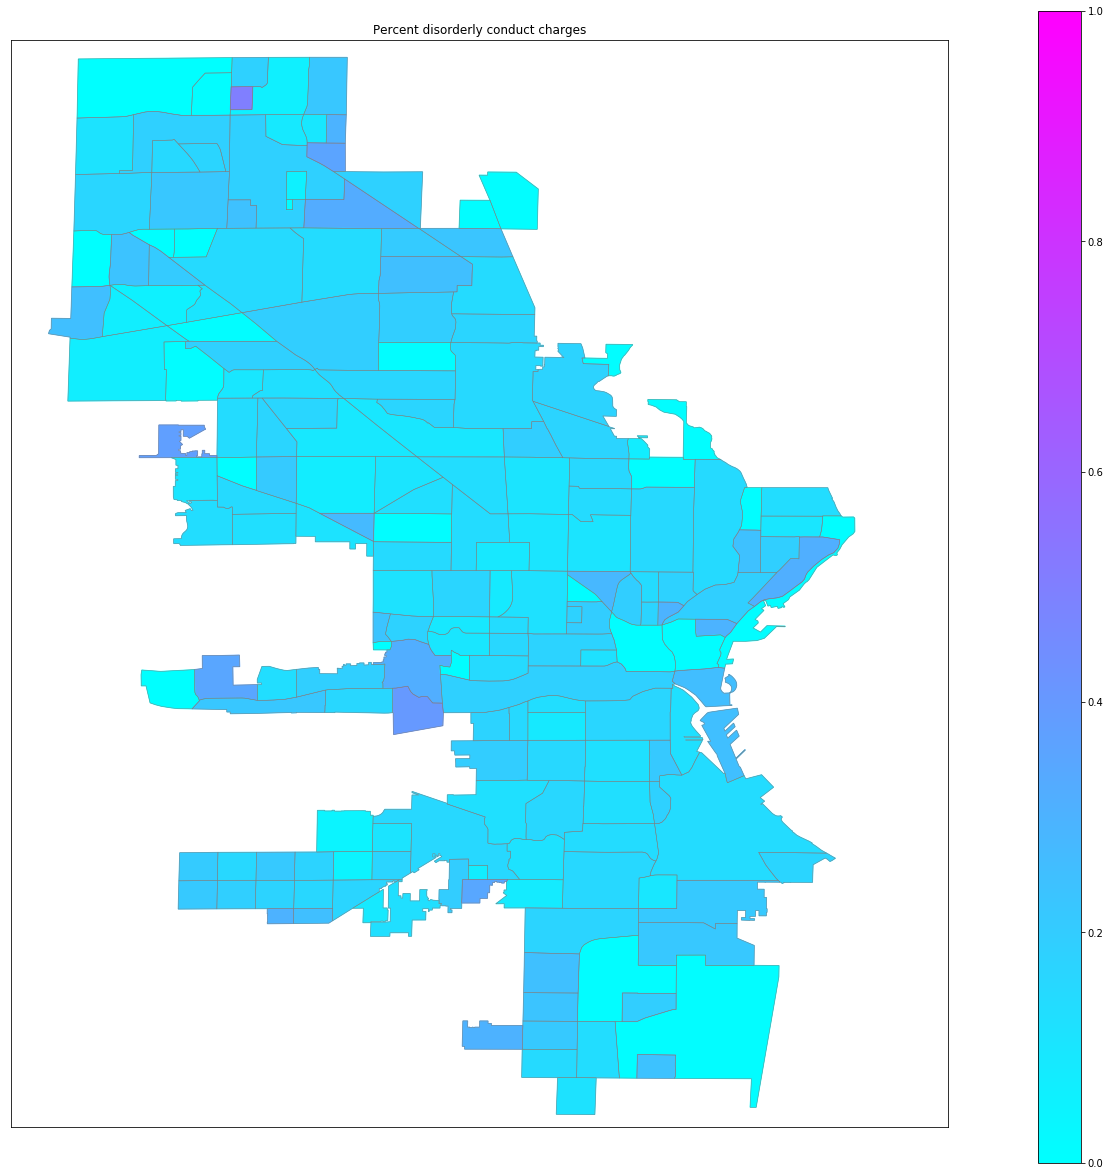

In [240]:
#plot percentage
from __future__ import (absolute_import, division, print_function)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase
import random

fig, ax = plt.subplots(figsize=(20,20))


# Lambert Conformal map of lower 48 states.
m = Basemap(projection = "cyl",
              resolution = "h",
              lat_0 = 43.0389025,
              lon_0 = -87.9064736,
              llcrnrlon = -88.080736,
              llcrnrlat = 42.917670,
              urcrnrlon = -87.839722,
              urcrnrlat = 43.19712)

shp_info = m.readshapefile("mke_nei",name="neighborhood", drawbounds=True,linewidth=0.45,color="gray")

colors={}
statenames=[]
cmap = plt.cm.cool # use "reversed hot" colormap
vmin = 0; vmax = 1 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.neighborhood_info:
    statename = shapedict["NEIGHBORHD"]
    pop = dict[statename]
    colors[statename] = cmap(pop)[:3]
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.neighborhood):
    color = rgb2hex(colors[statenames[nshape]])
    poly = Polygon(seg,facecolor=color,edgecolor=color)
    ax.add_patch(poly)


ax.set_title("Percent disorderly conduct charges")


#%% ---------   Show color bar  ---------------------------------------
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation="vertical",)

plt.show()

In [234]:
#resiting officer
verdicts['num resist guilty'] = 0
verdicts['num resist non-guilty'] = 0
for x in range(0, len(data)):
    if data.loc[x, 'c_violation'] == 'Ordinance 105-138-2, Resisting / Obstructing Police Officer':
        if g[x] == 1:
            verdicts.loc[data.loc[x, 'neighborhood'], 'num resist guilty'] = verdicts.loc[data.loc[x, 'neighborhood'], 'num resist guilty']+1
        else:
            verdicts.loc[data.loc[x, 'neighborhood'], 'num resist non-guilty'] = verdicts.loc[data.loc[x, 'neighborhood'], 'num resist non-guilty']+1
            
verdicts['percent resist non-guilty'] = verdicts['num resist non-guilty'] / (verdicts['num resist non-guilty'] + verdicts['num resist guilty'])
verdicts['percent resist'] = (verdicts['num resist non-guilty'] + verdicts['num resist guilty']) / (verdicts['num non-guilty'] + verdicts['num guilty'])

In [241]:
# add values to dict
for index, row in verdicts.iterrows():
    dict[str(index).upper()] = row['percent resist']

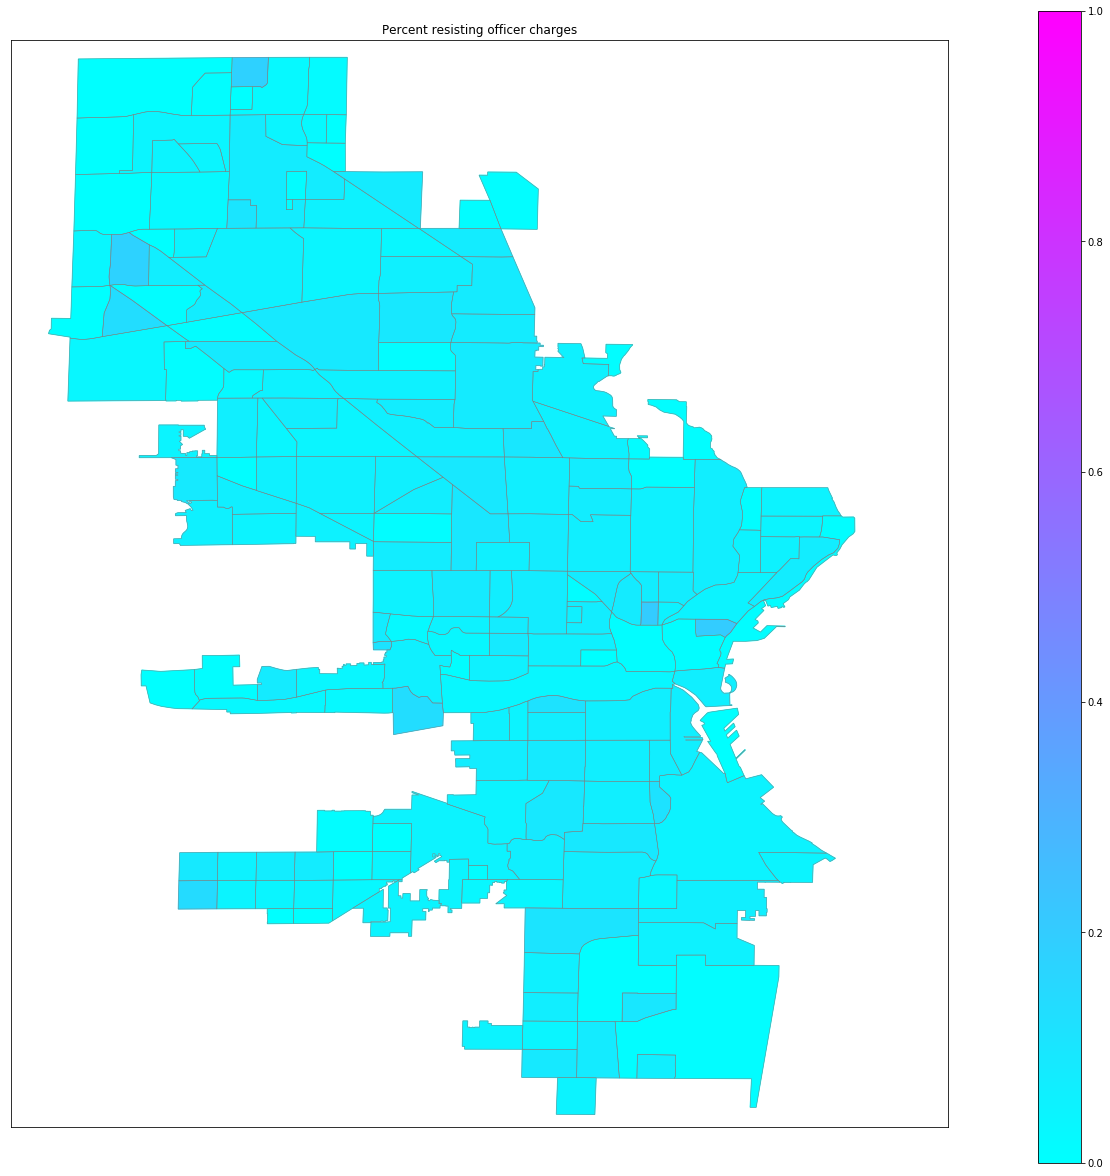

In [242]:
#plot percentage
from __future__ import (absolute_import, division, print_function)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase
import random

fig, ax = plt.subplots(figsize=(20,20))


# Lambert Conformal map of lower 48 states.
m = Basemap(projection = "cyl",
              resolution = "h",
              lat_0 = 43.0389025,
              lon_0 = -87.9064736,
              llcrnrlon = -88.080736,
              llcrnrlat = 42.917670,
              urcrnrlon = -87.839722,
              urcrnrlat = 43.19712)

shp_info = m.readshapefile("mke_nei",name="neighborhood", drawbounds=True,linewidth=0.45,color="gray")

colors={}
statenames=[]
cmap = plt.cm.cool # use "reversed hot" colormap
vmin = 0; vmax = 1 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.neighborhood_info:
    statename = shapedict["NEIGHBORHD"]
    pop = dict[statename]
    colors[statename] = cmap(pop)[:3]
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.neighborhood):
    color = rgb2hex(colors[statenames[nshape]])
    poly = Polygon(seg,facecolor=color,edgecolor=color)
    ax.add_patch(poly)


ax.set_title("Percent resisting officer charges")


#%% ---------   Show color bar  ---------------------------------------
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation="vertical",)

plt.show()

In [235]:
#marijuana
verdicts['num marijuana guilty'] = 0
verdicts['num marijuana non-guilty'] = 0
for x in range(0, len(data)):
    if data.loc[x, 'c_violation'] == 'Ordinance 106-38-2, Possession of Marijuana':
        if g[x] == 1:
            verdicts.loc[data.loc[x, 'neighborhood'], 'num marijuana guilty'] = verdicts.loc[data.loc[x, 'neighborhood'], 'num marijuana guilty']+1
        else:
            verdicts.loc[data.loc[x, 'neighborhood'], 'num marijuana non-guilty'] = verdicts.loc[data.loc[x, 'neighborhood'], 'num marijuana non-guilty']+1
            
verdicts['percent marijuana non-guilty'] = verdicts['num marijuana non-guilty'] / (verdicts['num marijuana non-guilty'] + verdicts['num marijuana guilty'])
verdicts['percent marijuana'] = (verdicts['num marijuana non-guilty'] + verdicts['num marijuana guilty']) / (verdicts['num non-guilty'] + verdicts['num guilty'])

In [243]:
# add values to dict
for index, row in verdicts.iterrows():
    dict[str(index).upper()] = row['percent marijuana']

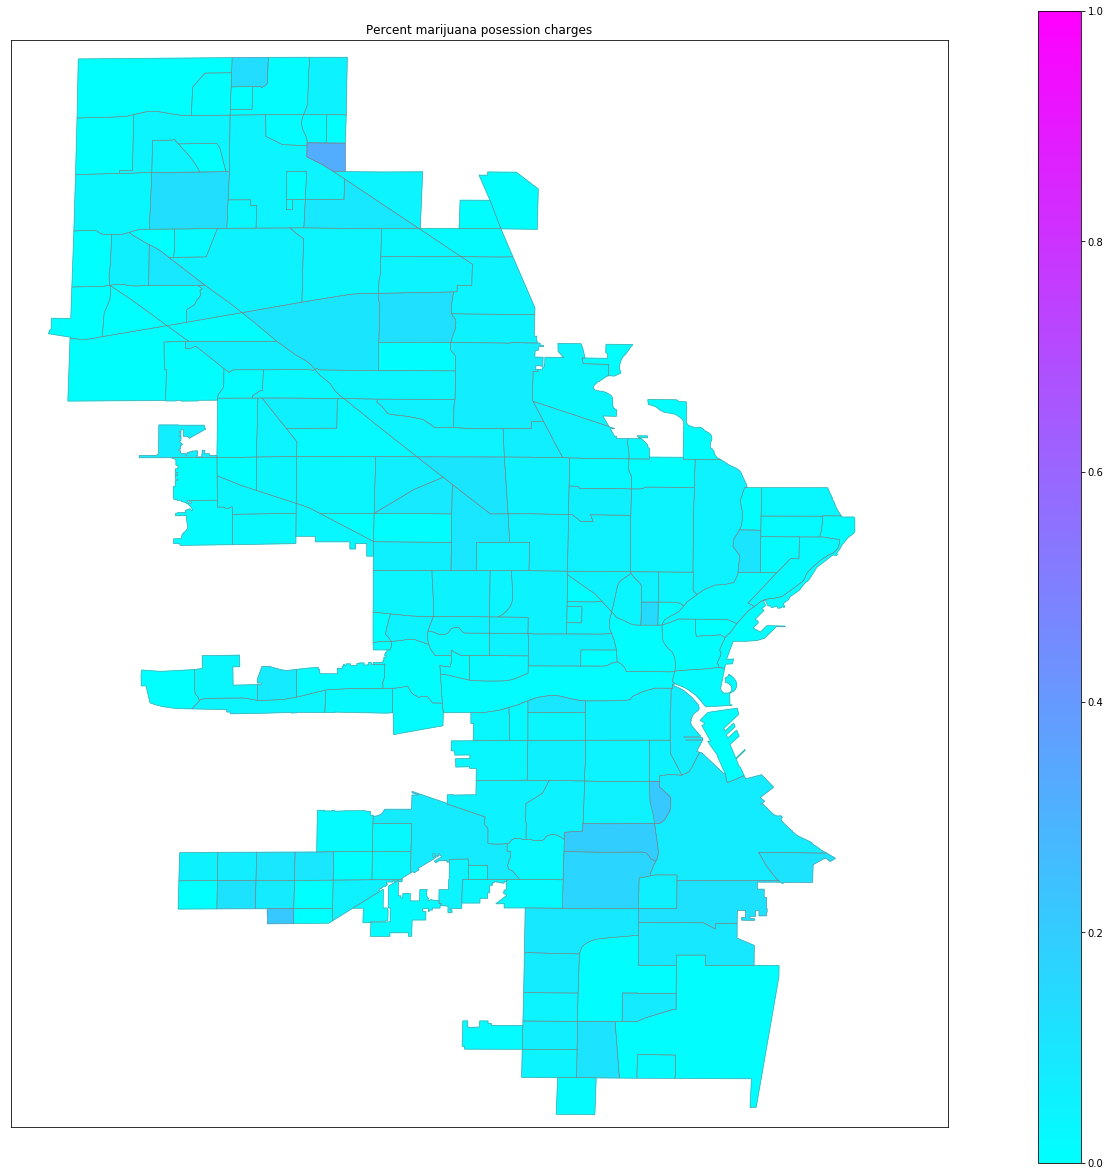

In [244]:
#plot percentage
from __future__ import (absolute_import, division, print_function)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase
import random

fig, ax = plt.subplots(figsize=(20,20))


# Lambert Conformal map of lower 48 states.
m = Basemap(projection = "cyl",
              resolution = "h",
              lat_0 = 43.0389025,
              lon_0 = -87.9064736,
              llcrnrlon = -88.080736,
              llcrnrlat = 42.917670,
              urcrnrlon = -87.839722,
              urcrnrlat = 43.19712)

shp_info = m.readshapefile("mke_nei",name="neighborhood", drawbounds=True,linewidth=0.45,color="gray")

colors={}
statenames=[]
cmap = plt.cm.cool # use "reversed hot" colormap
vmin = 0; vmax = 1 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.neighborhood_info:
    statename = shapedict["NEIGHBORHD"]
    pop = dict[statename]
    colors[statename] = cmap(pop)[:3]
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.neighborhood):
    color = rgb2hex(colors[statenames[nshape]])
    poly = Polygon(seg,facecolor=color,edgecolor=color)
    ax.add_patch(poly)


ax.set_title("Percent marijuana posession charges")


#%% ---------   Show color bar  ---------------------------------------
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation="vertical",)

plt.show()

In [236]:
verdicts

,num guilty,num non-guilty,percent non-guilty,num dis conduct guilty,num dis conduct non-guilty,percent dis conduct non-guilty,percent dis conduct,num resist guilty,num resist non-guilty,percent resist non-guilty,percent resist,num marijuana guilty,num marijuana non-guilty,percent marijuana non-guilty,percent marijuana
Capitol Heights,2449,184,0.069882,209,33,0.136364,0.091910,106,6,0.053571,0.042537,59,2,0.032787,0.023167
Harambee,3264,250,0.071144,486,47,0.088180,0.151679,181,19,0.095000,0.056915,157,3,0.018750,0.045532
Silver Spring,2432,206,0.078089,479,34,0.066277,0.194466,218,12,0.052174,0.087187,267,10,0.036101,0.105004
Midtown,2092,159,0.070635,249,20,0.074349,0.119502,155,13,0.077381,0.074633,115,2,0.017094,0.051977
Lindsay Heights,2637,170,0.060563,259,27,0.094406,0.101888,182,7,0.037037,0.067332,152,5,0.031847,0.055932
Westown,3432,296,0.079399,809,65,0.074371,0.234442,166,26,0.135417,0.051502,94,0,0.000000,0.025215
Burnham Park,461,58,0.111753,90,13,0.126214,0.198459,34,4,0.105263,0.073218,16,1,0.058824,0.032755
Riverside Park,291,50,0.146628,71,12,0.144578,0.243402,13,4,0.235294,0.049853,32,4,0.111111,0.105572
Historic Mitchell Street,3099,206,0.062330,383,25,0.061275,0.123449,211,8,0.036530,0.066263,147,6,0.039216,0.046293
Uptown,1541,160,0.094062,233,19,0.075397,0.148148,122,4,0.031746,0.074074,98,4,0.039216,0.059965
